# 1.

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import euclidean_distances
from sklearn_extra.cluster import KMedoids
import seaborn as sns

# Scale the data using min-max scaler
from sklearn.preprocessing import MinMaxScaler
#import sillhouette score
from sklearn.metrics import silhouette_score

In [42]:
#Cargar y verificar integridad de los datos. Realizar curación si corresponde.
data = pd.read_csv('Pokemon.csv')
data.head()


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [43]:
#some values in type 2 are missing, so we will fill them with the value 'None'
data['Type 2'].fillna('None', inplace=True)

# 2.

In [44]:
#Graficar matriz de correlación y realizar un scatter_matrix con plotly.

fig = px.scatter_matrix(data, dimensions=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'], color='Legendary')
fig.show()


In [ ]:
'''sns.pairplot(data, hue='Legendary')
plt.show()'''

In [ ]:
#total vs legendary, boxplot
fig = px.box(data, x='Legendary', y='Total')
fig.show()


In [ ]:
#total of only legendaries vs generation, scatter plot
fig = px.scatter(data, x='Generation', y='Total', color='Legendary')
#average line for total
data_common = data[data['Legendary'] == False]
fig.add_scatter(x=np.arange(1, 7), y=[data_common[data_common['Generation'] == i]['Total'].mean() for i in range(1, 7)], mode='lines', name='Average Total')
data_legendary = data[data['Legendary'] == True]
fig.add_scatter(x=np.arange(1, 7), y=[data_legendary[data_legendary['Generation'] == i]['Total'].mean() for i in range(1, 7)], mode='lines', name='Average Total Legendary')

fig.show()



# K-MEAN

In [4]:
#K-means clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [45]:
n_types = data['Type 1'].nunique()
n_types

18

In [46]:
data_copy = data.copy()
#data_copy = data_copy[data_copy['Legendary'] == False]
data_new = data_copy.drop(['#','Name', 'Generation', 'Legendary', 'Total', 'Type 1', 'Type 2'], axis=1)#, 'Type 1', 'Type 2', 'Generation', 'Legendary', 'Total'], axis=1)

categorial_features = data_new.select_dtypes(include=['object']).columns
data_scaled = pd.get_dummies(data_new, columns=categorial_features)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_scaled)

In [50]:

distances_list = []
sillhouette_list = []

K = 80
for j in range(2, K):
    kmeans = KMeans(n_clusters=j, random_state=42)
    data_new['Cluster'] = kmeans.fit_predict(data_scaled)
    
    total_distance = 0
    for i in range(j):
        cluster_points = data_scaled[data_new['Cluster'] == i]
        cluster_center = kmeans.cluster_centers_[i]
        total_distance += np.sum(np.linalg.norm(cluster_points - cluster_center, axis=1))

    
    #calculate sillhouette
    sillhouette_list.append(silhouette_score(data_scaled, data_new['Cluster']))
    
    mean_distance = total_distance / data.shape[0]
    distances_list.append(mean_distance)


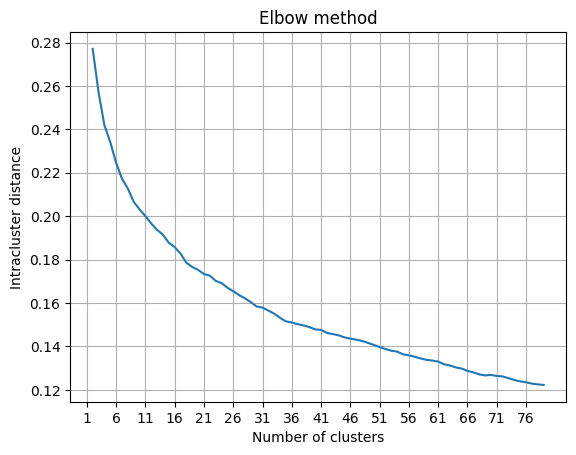

In [51]:
#plot elbow method

plt.plot(np.arange(2,K), distances_list)
plt.xlabel('Number of clusters')
plt.ylabel('Intracluster distance')
plt.xticks(np.arange(1,K,5))
plt.grid()
plt.title('Elbow method')
plt.show()


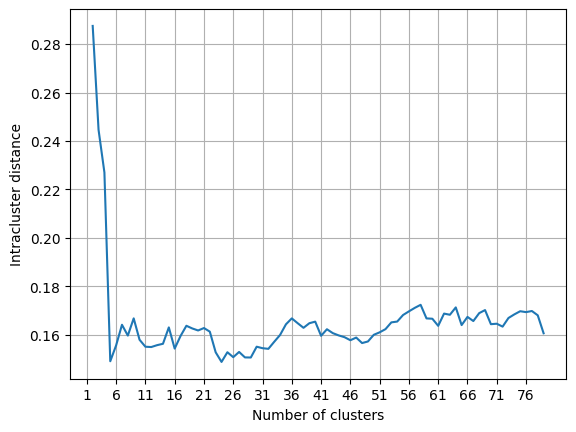

In [52]:
#plot sillhouette
plt.plot(np.arange(2,K), sillhouette_list)
plt.xlabel('Number of clusters')
plt.ylabel('Intracluster distance')
plt.xticks(np.arange(1,K,5))
plt.grid()
plt.show()

In [53]:
data_copy = data.copy()
#data_copy = data_copy[data_copy['Legendary'] == False]
data_new = data_copy.drop(['#','Name', 'Generation', 'Legendary', 'Total', 'Type 1', 'Type 2'], axis=1)#, 'Type 1', 'Type 2', 'Generation', 'Legendary', 'Total'], axis=1)

categorial_features = data_new.select_dtypes(include=['object']).columns
data_scaled = pd.get_dummies(data_new, columns=categorial_features)
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data_scaled)

In [54]:
# Set the number of clusters to 10
k = 20

# Perform KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42)
data_new['Cluster'] = kmeans.fit_predict(data_scaled)

In [55]:
clusters = data_new['Cluster'].unique()

for cluster in clusters:
    cluster_data = data_new[data_new['Cluster'] == cluster].drop('Cluster', axis=1)
    
    # Prepare data for radar graph
    radar_data = cluster_data.mean().reset_index()
    radar_data.columns = ['theta', 'r']
    
    # Create radar graph
    fig = px.line_polar(radar_data, r='r', theta='theta', line_close=True, range_r=[0, 220],
                        title=f'Cluster {cluster} Radar Graph, {cluster_data.shape[0]} pokemons')
    
    # Show plot
    fig.show()


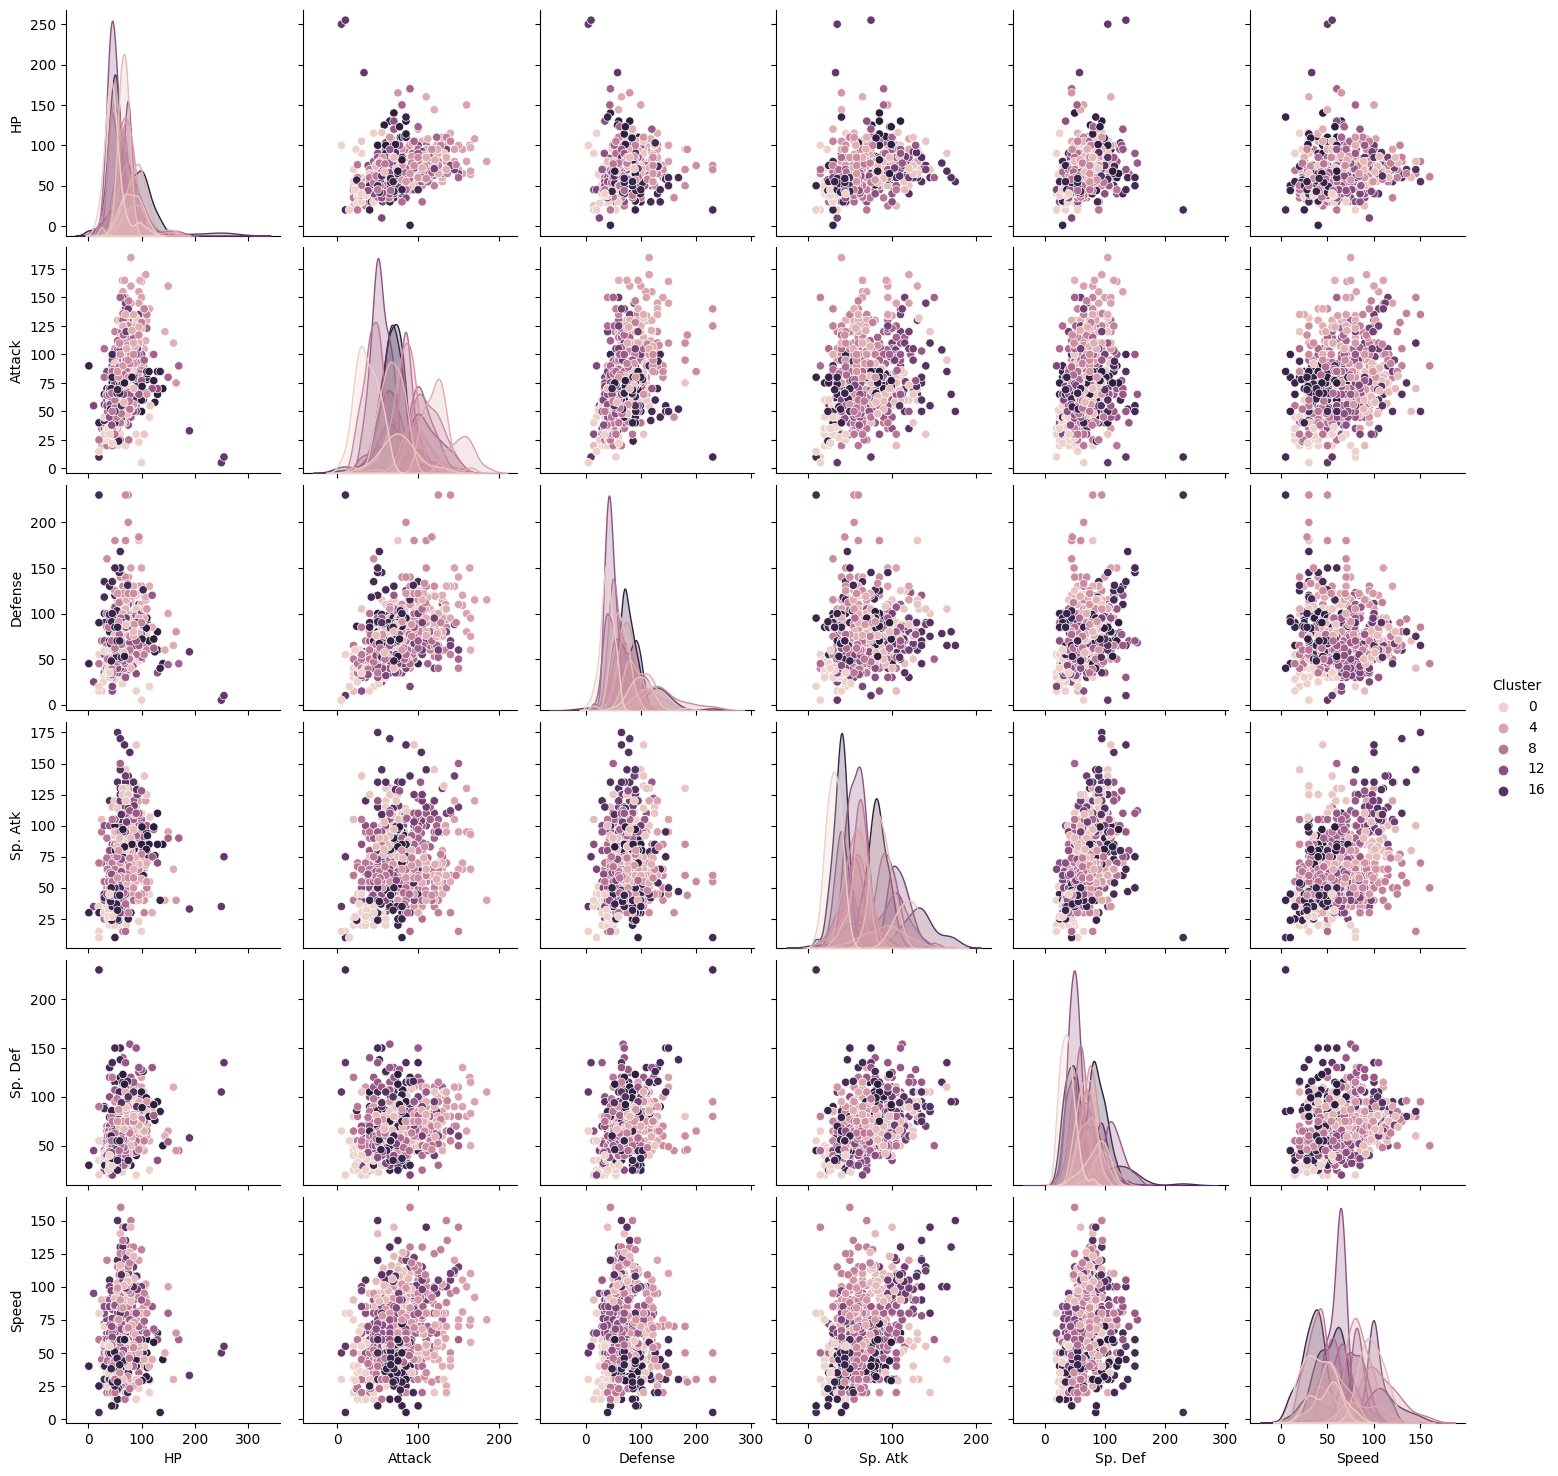

In [41]:
#Realizar un grafico scatter_matrix con plotly usando como parámetro color la variable clústeres.

fig = sns.pairplot(data_new, hue='Cluster')
plt.show()

# K-MEDIOD

In [ ]:
#elbow method
data = pd.read_csv('Pokemon.csv')
data = data[data['Legendary'] == False]
data_new = data.drop(['#','Name', 'Type 1', 'Type 2', 'Generation', 'Legendary', 'Total'], axis=1)

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_new)



distances_list = []

for j in range(2, 20):
    kmedians = KMedoids(n_clusters=j, random_state=42)
    data['Cluster'] = kmedians.fit_predict(data_scaled)
    
    total_distance = 0
    for i in range(j):
        cluster_points = data_scaled[data['Cluster'] == i]
        cluster_center = kmedians.cluster_centers_[i]
        total_distance += np.sum(np.linalg.norm(cluster_points - cluster_center, axis=1))**2
    
    mean_distance = total_distance / data.shape[0]
    distances_list.append(mean_distance)

In [ ]:
#plot elbow method
plt.plot(np.arange(2,20), distances_list)
plt.xlabel('Number of clusters')
plt.ylabel('Intracluster distance')
plt.title('Elbow method')
plt.show()


# K-MEDIAN

In [ ]:
#elbow method
data = pd.read_csv('Pokemon.csv')
data = data[data['Legendary'] == False]
data_new = data.drop(['#', 'Name', 'Type 1', 'Type 2', 'Generation', 'Legendary', 'Total'], axis=1)
distances_list = []

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_new)

for j in range(2, 20):
    kmedians = KMedoids(n_clusters=j, random_state=42)
    data['Cluster'] = kmedians.fit_predict(data_scaled)
    
    total_distance = 0
    for i in range(j):
        cluster_points = data_scaled[data['Cluster'] == i]
        cluster_center = kmedians.cluster_centers_[i]
        total_distance += np.sum(np.linalg.norm(cluster_points - cluster_center, axis=1))
    
    mean_distance = total_distance / data.shape[0]
    distances_list.append(mean_distance)

In [ ]:
#plot elbow method
plt.plot(np.arange(2,20), distances_list)
plt.xlabel('Number of clusters')
plt.ylabel('Intracluster distance')
plt.title('Elbow method')
plt.show()